# import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 1.Read the dataset

In [2]:
df = pd.read_csv('training_set.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# 2.Missing values handling

In [4]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df.isna().sum()[0:60]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [6]:
df.isna().sum()[60:]

GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [7]:
df['Alley'] = df['Alley'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')
df['PoolQC'] = df['PoolQC'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [8]:
df.isna().sum()[0:60]

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [9]:
df.isna().sum()[60:]

GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [10]:
df['LotFrontage'].mean()

70.04995836802665

In [11]:
df['MSZoning'].mode()[0]

'RL'

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

In [15]:
df.isna().sum()[:60]

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional

In [16]:
df.isna().sum()[60:]

GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

# 3.Outliers handling

In [17]:
# df

In [18]:
cat = []
con = []
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [19]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [20]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [21]:
len(con)

38

In [22]:
len(cat)

43

In [23]:
df[con]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [24]:
from scipy.stats import zscore

In [25]:
zscore(df[con])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,1.723747,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,1.726120,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,1.728492,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


In [26]:
zscore(df['LotFrontage'])

0      -0.229372
1       0.451936
2      -0.093110
3      -0.456474
4       0.633618
          ...   
1455   -0.365633
1456    0.679039
1457   -0.183951
1458   -0.093110
1459    0.224833
Name: LotFrontage, Length: 1460, dtype: float64

In [27]:
np.where(np.abs(zscore(df['LotFrontage'])>3))[0].tolist()

[171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337]

In [28]:
list(np.where(np.abs(zscore(df['LotFrontage'])>3))[0])

[171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337]

In [29]:
out = []
for i in con:
    out = out + list(df[(zscore(df[i])>3)|(zscore(df[i])<-3)].index)
    out

In [30]:
p1 = [10,20,30]
p2 = [40,50]
p1 + p2

[10, 20, 30, 40, 50]

In [31]:
out

[9,
 48,
 93,
 125,
 165,
 246,
 291,
 300,
 312,
 335,
 411,
 488,
 520,
 535,
 635,
 637,
 703,
 705,
 713,
 861,
 969,
 985,
 1030,
 1062,
 1144,
 1186,
 1190,
 1266,
 1393,
 1416,
 171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337,
 53,
 249,
 313,
 335,
 384,
 451,
 457,
 661,
 706,
 769,
 848,
 1298,
 1396,
 375,
 533,
 88,
 185,
 191,
 218,
 241,
 250,
 304,
 375,
 378,
 398,
 461,
 508,
 519,
 583,
 676,
 703,
 726,
 745,
 980,
 991,
 1123,
 1149,
 1213,
 1268,
 1327,
 1352,
 1435,
 1457,
 304,
 630,
 747,
 1132,
 1137,
 1349,
 37,
 58,
 70,
 105,
 115,
 161,
 169,
 178,
 224,
 297,
 349,
 403,
 477,
 517,
 523,
 654,
 691,
 718,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1111,
 1169,
 1228,
 1289,
 1298,
 1373,
 1417,
 70,
 178,
 523,
 898,
 1182,
 1298,
 24,
 52,
 113,
 116,
 153,
 166,
 233,
 253,
 260,
 263,
 271,
 273,
 313,
 322,
 355,
 414,
 440,
 446,
 470,
 493,
 542,
 548,
 577,
 586,
 599,
 666,
 697,
 764,
 785,
 82

In [32]:
outliers = np.unique(out)
outliers

array([   1,    3,    5,    7,    8,    9,   17,   24,   26,   28,   33,
         37,   39,   41,   46,   48,   50,   51,   52,   53,   55,   58,
         64,   70,   72,   74,   78,   80,   88,   93,  102,  104,  105,
        113,  115,  116,  118,  120,  125,  129,  137,  144,  153,  154,
        159,  161,  165,  166,  169,  170,  171,  176,  178,  182,  185,
        187,  188,  189,  191,  196,  197,  198,  201,  205,  213,  215,
        218,  224,  231,  233,  237,  241,  245,  246,  249,  250,  251,
        253,  258,  260,  263,  267,  271,  273,  277,  278,  280,  289,
        291,  293,  297,  298,  299,  300,  304,  306,  309,  312,  313,
        314,  322,  325,  326,  328,  330,  332,  335,  339,  342,  343,
        346,  349,  351,  352,  355,  357,  358,  359,  360,  365,  366,
        367,  375,  378,  380,  384,  389,  398,  400,  403,  406,  411,
        414,  420,  421,  426,  440,  441,  446,  451,  454,  457,  459,
        461,  462,  470,  471,  473,  475,  477,  4

In [33]:
len(outliers)

445

In [34]:
# Remove the outliers from the dataset
df.drop(outliers,axis=0,inplace=True)

In [35]:
df[0:60]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,3,60,RL,68.000000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,5,60,RL,84.000000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
6,7,20,RL,75.000000,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
10,11,20,RL,70.000000,11200,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,129500
11,12,60,RL,85.000000,11924,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,7,2006,New,Partial,345000
12,13,20,RL,70.049958,12968,Pave,None,IR2,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,144000
13,14,20,RL,91.000000,10652,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,8,2007,New,Partial,279500
14,15,20,RL,70.049958,10920,Pave,None,IR1,Lvl,AllPub,...,0,None,GdWo,None,0,5,2008,WD,Normal,157000
15,16,45,RM,51.000000,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,None,0,7,2007,WD,Normal,132000


In [36]:
df.shape

(1015, 81)

In [37]:
# Reinitialize the index
df.index = range(0,1015,1)

In [38]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
2,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
3,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
4,11,20,RL,70.0,11200,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1453,180,RM,35.0,3675,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2006,WD,Normal,145000
1011,1454,20,RL,90.0,17217,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,7,2006,WD,Abnorml,84500
1012,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,None,None,None,0,10,2009,WD,Normal,185000
1013,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000


# 4.EDA 

In [39]:
# select best con and best cat column

In [40]:
df.corr()['SalePrice'].sort_values()

EnclosedPorch   -0.205026
OverallCond     -0.158932
BsmtFinSF2      -0.098253
MiscVal         -0.070746
MSSubClass      -0.037097
YrSold          -0.026457
Id              -0.024314
LowQualFinSF    -0.020850
3SsnPorch       -0.001348
ScreenPorch      0.017633
MoSold           0.088510
BsmtUnfSF        0.219351
BsmtFullBath     0.231293
HalfBath         0.268377
BedroomAbvGr     0.276780
2ndFlrSF         0.318098
WoodDeckSF       0.330729
BsmtFinSF1       0.350999
LotArea          0.364850
LotFrontage      0.386450
OpenPorchSF      0.391954
MasVnrArea       0.418379
Fireplaces       0.436872
GarageYrBlt      0.556694
YearRemodAdd     0.566916
1stFlrSF         0.593348
TotRmsAbvGrd     0.594391
TotalBsmtSF      0.627239
YearBuilt        0.632075
FullBath         0.669794
GarageArea       0.670352
GarageCars       0.697028
GrLivArea        0.757007
OverallQual      0.813903
SalePrice        1.000000
BsmtHalfBath          NaN
KitchenAbvGr          NaN
PoolArea              NaN
Name: SalePr

In [41]:
Q = pd.DataFrame(df.corr()['SalePrice'].sort_values())
imp_con_columns = Q[(Q['SalePrice']>0.1)|(Q['SalePrice']<-0.1)].index.tolist()
imp_con_columns.remove('SalePrice')

In [42]:
imp_con_columns

['EnclosedPorch',
 'OverallCond',
 'BsmtUnfSF',
 'BsmtFullBath',
 'HalfBath',
 'BedroomAbvGr',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'LotArea',
 'LotFrontage',
 'OpenPorchSF',
 'MasVnrArea',
 'Fireplaces',
 'GarageYrBlt',
 'YearRemodAdd',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YearBuilt',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [43]:
len(cat)

43

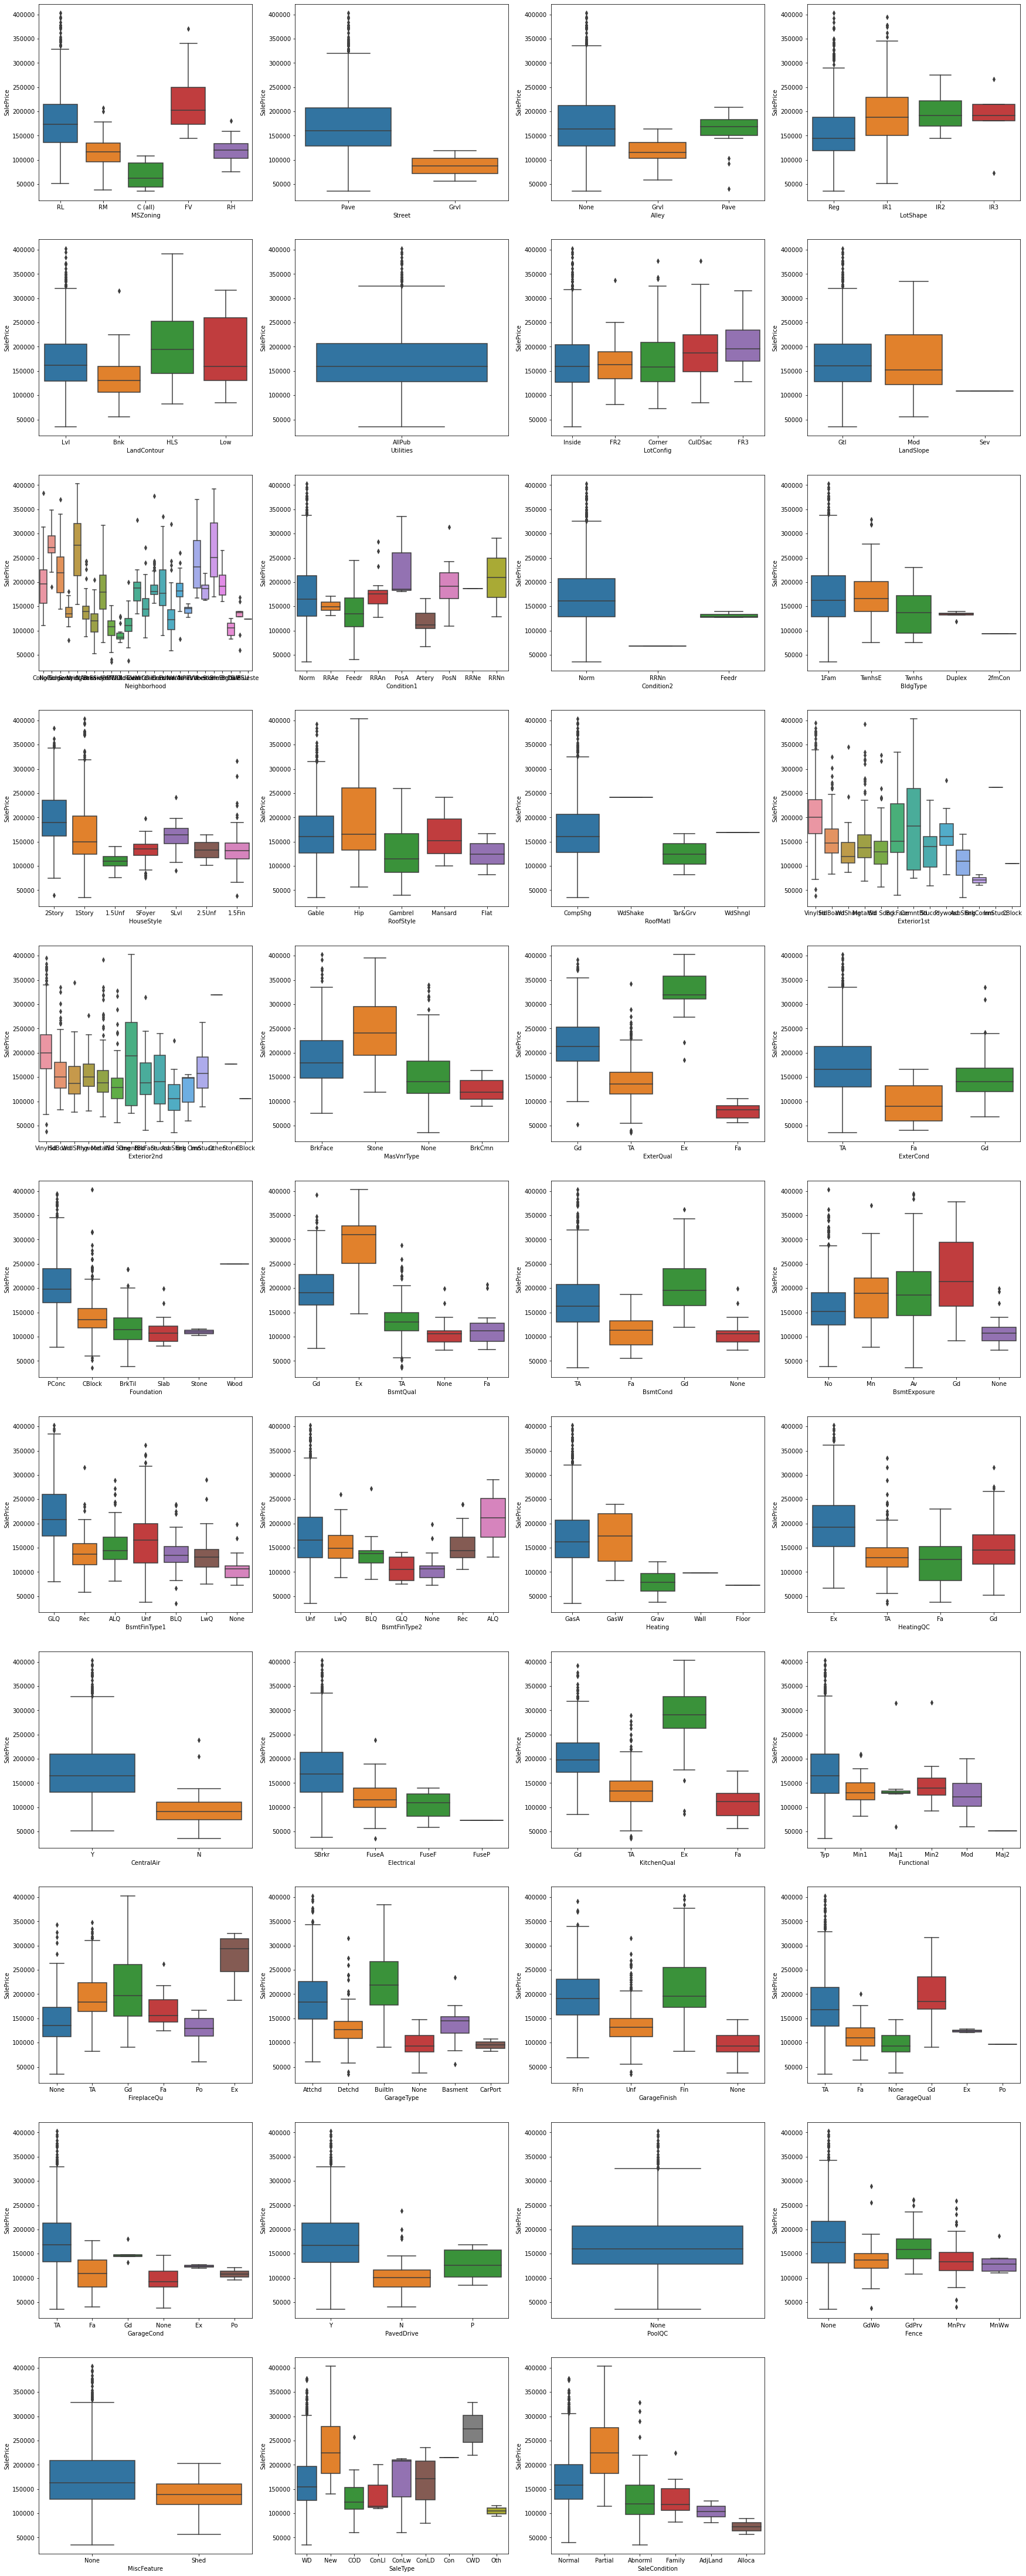

In [44]:
plt.figure(figsize=(30,80))
x = 1
for i in cat:
    plt.subplot(11,4,x)    # 11 rows and 4 columns
    sns.boxplot(df[i],df['SalePrice'])
    x = x+1

In [45]:
# I will consider all the categorical columns

# 5.Preprocessing

In [46]:
X = df.drop(['SalePrice','Id'],axis=1)
Y = df['SalePrice']

In [47]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
2,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
3,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
4,20,RL,70.0,11200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,180,RM,35.0,3675,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,5,2006,WD,Normal
1011,20,RL,90.0,17217,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,7,2006,WD,Abnorml
1012,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,10,2009,WD,Normal
1013,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal


In [48]:
Y

0       208500
1       223500
2       250000
3       307000
4       129500
         ...  
1010    145000
1011     84500
1012    185000
1013    175000
1014    210000
Name: SalePrice, Length: 1015, dtype: int64

In [49]:
# X[imp_con_columns]

In [50]:
# Scaling of all the continuous columns >> Normalization
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(X[imp_con_columns])
X1 = pd.DataFrame(array,columns=imp_con_columns)
X1

,EnclosedPorch,OverallCond,BsmtUnfSF,BsmtFullBath,HalfBath,BedroomAbvGr,2ndFlrSF,WoodDeckSF,BsmtFinSF1,LotArea,...,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,FullBath,GarageArea,GarageCars,GrLivArea,OverallQual
0,0.0,0.4,0.080257,1.0,1.0,0.50,0.598458,0.000000,0.428919,0.249485,...,0.883333,0.236292,0.625,0.396664,0.951613,0.666667,0.520418,0.50,0.500787,0.625
1,0.0,0.4,0.232210,1.0,1.0,0.50,0.606868,0.000000,0.295261,0.347186,...,0.866667,0.272470,0.375,0.426321,0.935484,0.666667,0.577398,0.50,0.530709,0.625
2,0.0,0.4,0.262172,1.0,1.0,0.75,0.737912,0.410256,0.397934,0.452214,...,0.833333,0.399661,0.750,0.530584,0.927419,0.666667,0.793922,0.75,0.692913,0.750
3,0.0,0.4,0.169609,1.0,0.0,0.50,0.000000,0.544872,0.831713,0.306501,...,0.916667,0.710006,0.500,0.781279,0.959677,0.666667,0.603989,0.50,0.494488,0.750
4,0.0,0.4,0.071696,1.0,0.0,0.50,0.000000,0.000000,0.550425,0.345441,...,0.250000,0.340305,0.250,0.481928,0.645161,0.333333,0.364672,0.25,0.237008,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.0,0.4,0.000000,1.0,0.0,0.25,0.000000,0.000000,0.332321,0.082871,...,0.916667,0.358395,0.250,0.253475,0.967742,0.333333,0.498575,0.50,0.249606,0.375
1011,0.0,0.4,0.609952,0.0,0.0,0.50,0.000000,0.076923,0.000000,0.555393,...,0.933333,0.396834,0.375,0.528267,0.975806,0.333333,0.000000,0.00,0.276378,0.375
1012,0.0,0.4,0.433922,1.0,0.0,0.25,0.000000,0.000000,0.249089,0.216337,...,0.916667,0.442623,0.375,0.565802,0.959677,0.666667,0.379867,0.50,0.308268,0.625
1013,0.0,0.4,0.509898,0.0,1.0,0.50,0.486335,0.000000,0.000000,0.230887,...,0.833333,0.291125,0.500,0.441613,0.919355,0.666667,0.436847,0.50,0.475984,0.500


In [51]:
# One hot encoding of categorical columns
X2 = pd.get_dummies(X[cat])
X2

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1011,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1012,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1013,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [52]:
# join x1 and x2
Xnew = X1.join(X2)
Xnew

,EnclosedPorch,OverallCond,BsmtUnfSF,BsmtFullBath,HalfBath,BedroomAbvGr,2ndFlrSF,WoodDeckSF,BsmtFinSF1,LotArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.4,0.080257,1.0,1.0,0.50,0.598458,0.000000,0.428919,0.249485,...,0,0,0,1,0,0,0,0,1,0
1,0.0,0.4,0.232210,1.0,1.0,0.50,0.606868,0.000000,0.295261,0.347186,...,0,0,0,1,0,0,0,0,1,0
2,0.0,0.4,0.262172,1.0,1.0,0.75,0.737912,0.410256,0.397934,0.452214,...,0,0,0,1,0,0,0,0,1,0
3,0.0,0.4,0.169609,1.0,0.0,0.50,0.000000,0.544872,0.831713,0.306501,...,0,0,0,1,0,0,0,0,1,0
4,0.0,0.4,0.071696,1.0,0.0,0.50,0.000000,0.000000,0.550425,0.345441,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.0,0.4,0.000000,1.0,0.0,0.25,0.000000,0.000000,0.332321,0.082871,...,0,0,0,1,0,0,0,0,1,0
1011,0.0,0.4,0.609952,0.0,0.0,0.50,0.000000,0.076923,0.000000,0.555393,...,0,0,0,1,1,0,0,0,0,0
1012,0.0,0.4,0.433922,1.0,0.0,0.25,0.000000,0.000000,0.249089,0.216337,...,0,0,0,1,0,0,0,0,1,0
1013,0.0,0.4,0.509898,0.0,1.0,0.50,0.486335,0.000000,0.000000,0.230887,...,0,0,0,1,0,0,0,0,1,0


# 6.Splitting the dataset

In [53]:
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.25,random_state=21)

In [54]:
xtrain.shape

(761, 262)

# 7.Feature selection

In [55]:
# OlS regression model
from statsmodels.api import OLS,add_constant

# ypred = m1x1 + m2x2 + m3x3 + ..... mnxn + c

xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     54.25
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          6.40e-276
Time:                        20:35:07   Log-Likelihood:                -8329.7
No. Observations:                 761   AIC:                         1.707e+04
Df Residuals:                     557   BIC:                         1.801e+04
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   2.11e+15   8.56e+15      0.247      0.805   -1.47e+16    1.89e+16
EnclosedPorch          4423.4652   3832.520      1.154      0.249   -3104.494     1.2e+04
OverallCond             3.09e+04   5239.937      5.898      0.000    2.06e+04    4.12e+04
BsmtUnfSF               -4.7e+04   3.51e+04     -1.339      0.181   -1.16e+05     2.2e+04
BsmtFullBath            882.5571   2142.069      0.412      0.680   -3324.964    5090.079
HalfBath               -582.1299   2424.309     -0.240      0.810   -5344.035    4179.776
BedroomAbvGr          -7416.4790   6791.050     -1.092      0.275   -2.08e+04    5922.719
2ndFlrSF              -1.233e+04   2.26e+05     -0.055      0.956   -4.56e+05    4.31e+05
WoodDeckSF             1.589e+04   3363.384      4.723      0.000    9279.372    2.25e+04
BsmtFinSF1            -1.116e+04   3.04e+04     -0.367      0.714   -7.09e+04    4.86e+04
LotArea                3.116e+04   8733.539      3.568      0.000     1.4e+04    4.83e+04
LotFrontage           -4720.8072   6447.824     -0.732      0.464   -1.74e+04    7944.216
OpenPorchSF            8300.7620   3525.645      2.354      0.019    1375.577    1.52e+04
MasVnrArea            -6035.4827   5741.047     -1.051      0.294   -1.73e+04    5241.267
Fireplaces             2974.3738   6741.013      0.441      0.659   -1.03e+04    1.62e+04
GarageYrBlt           -7859.4902   7173.580     -1.096      0.274    -2.2e+04    6231.087
YearRemodAdd           7397.4806   3917.428      1.888      0.059    -297.258    1.51e+04
1stFlrSF              -5.719e+04    2.8e+05     -0.204      0.838   -6.07e+05    4.93e+05
TotRmsAbvGrd          -3348.2437   8691.134     -0.385      0.700   -2.04e+04    1.37e+04
TotalBsmtSF            9.202e+04    4.2e+04      2.189      0.029    9436.079    1.75e+05
YearBuilt               4.53e+04   1.18e+04      3.837      0.000    2.21e+04    6.85e+04
FullBath                675.6602   8051.192      0.084      0.933   -1.51e+04    1.65e+04
GarageArea             2.555e+04   9926.433      2.573      0.010    6047.798     4.5e+04
GarageCars             1.098e+04   9976.797      1.100      0.272   -8618.928    3.06e+04
GrLivArea              2.162e+05   4.02e+05      0.537      0.591   -5.74e+05    1.01e+06
OverallQual            4.747e+04   8937.741      5.312      0.000    2.99e+04     6.5e+04
MSZoning_C (all)       1.345e+14   5.45e+14      0.247      0.805   -9.37e+14    1.21e+15
MSZoning_FV            1.345e+14   5.45e+14      0.247      0.805   -9.37e+14    1.21e+15
MSZoning_RH            1.345e+14   5.45e+14      0.247      0.805   -9.37e+14    1.21e+15
MSZoning_RL            1.345e+14   5.45e+14      0.247      0.805   -9.37e+14    1.21e+15
MSZoning_RM            1.345e+14   5.45e+14      0.247      0.805   -9.37e+14    1.21e+15
Street_Grvl           -

In [56]:
# 100 features

In [57]:
ols.pvalues.sort_values()

OverallCond          6.388485e-09
OverallQual          1.573777e-07
WoodDeckSF           2.942594e-06
YearBuilt            1.386790e-04
LotArea              3.908358e-04
                         ...     
RoofStyle_Mansard    8.052686e-01
HalfBath             8.103240e-01
1stFlrSF             8.382436e-01
FullBath             9.331498e-01
2ndFlrSF             9.564243e-01
Length: 263, dtype: float64

In [58]:
ols.pvalues.sort_values().index

Index(['OverallCond', 'OverallQual', 'WoodDeckSF', 'YearBuilt', 'LotArea',
       'GarageArea', 'OpenPorchSF', 'TotalBsmtSF', 'YearRemodAdd', 'BsmtUnfSF',
       ...
       'Exterior1st_CemntBd', 'SaleType_Con', 'Neighborhood_SWISU',
       'SaleType_CWD', 'SaleType_Oth', 'RoofStyle_Mansard', 'HalfBath',
       '1stFlrSF', 'FullBath', '2ndFlrSF'],
      dtype='object', length=263)

In [59]:
ols.rsquared_adj

0.9343125625231352

In [60]:
rsq = round(ols.rsquared_adj,4)
col_to_drop = ols.pvalues.sort_values().index[-1]
rsq,col_to_drop

(0.9343, '2ndFlrSF')

In [61]:
Xnew = Xnew.drop(col_to_drop,axis=1)   # Drop the column '2ndFlrSF'

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.25,random_state=21)

xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()
rsq = round(ols.rsquared_adj,4)
col_to_drop = ols.pvalues.sort_values().index[-1]
rsq,col_to_drop

(0.9343, 'FullBath')

In [62]:
r = []
for i in range(0,150,1):
    Xnew = Xnew.drop(col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.25,random_state=21)
    xconst = add_constant(xtrain,has_constant='add')
    ols = OLS(ytrain,xconst).fit()
    rsq = round(ols.rsquared_adj,4)
    col_to_drop = ols.pvalues.sort_values().index[-1]
    if col_to_drop == 'const':
        col_to_drop = ols.pvalues.sort_values().index[-2]
    r.append(rsq)

In [63]:
Xnew

,OverallCond,BsmtUnfSF,WoodDeckSF,LotArea,OpenPorchSF,YearRemodAdd,1stFlrSF,TotalBsmtSF,YearBuilt,GarageArea,...,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,0.4,0.080257,0.000000,0.249485,0.250000,0.883333,0.236292,0.396664,0.951613,0.520418,...,0,0,0,0,0,1,0,0,0,1
1,0.4,0.232210,0.000000,0.347186,0.172131,0.866667,0.272470,0.426321,0.935484,0.577398,...,0,0,0,0,0,1,0,0,0,1
2,0.4,0.262172,0.410256,0.452214,0.344262,0.833333,0.399661,0.530584,0.927419,0.793922,...,0,0,0,0,0,1,0,0,0,1
3,0.4,0.169609,0.544872,0.306501,0.233607,0.916667,0.710006,0.781279,0.959677,0.603989,...,0,0,0,0,0,1,0,0,0,1
4,0.4,0.071696,0.000000,0.345441,0.000000,0.250000,0.340305,0.481928,0.645161,0.364672,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.4,0.000000,0.000000,0.082871,0.114754,0.916667,0.358395,0.253475,0.967742,0.498575,...,0,0,0,0,0,1,0,0,0,1
1011,0.4,0.609952,0.076923,0.555393,0.229508,0.933333,0.396834,0.528267,0.975806,0.000000,...,0,0,0,0,0,1,1,0,0,0
1012,0.4,0.433922,0.000000,0.216337,0.463115,0.916667,0.442623,0.565802,0.959677,0.379867,...,0,0,0,0,0,1,0,0,0,1
1013,0.4,0.509898,0.000000,0.230887,0.163934,0.833333,0.291125,0.441613,0.919355,0.436847,...,0,0,0,0,0,1,0,0,0,1


In [64]:
len(Xnew.columns)

111

# 8.Model training

In [66]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

# 9.Model evaluation

In [73]:
# Testing data evaluation
ypredtest = lin_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 14633.287365429998
Mean_squared_error: 433459754.8545088
R_squared: 0.9007286580870091
Adj_R2: 0.823129228845164


In [74]:
# Training data evaluation
ypredtrain = lin_model.predict(xtrain)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9797.507304575596
Mean_squared_error: 200348896.38492614
R_squared: 0.9487796272282586
Adj_R2: 0.94001928612246


# Build a regularization model

# Without hyperparameter tuning

# 1.Ridge regression

In [76]:
ridge_model = Ridge()   # alpha=1.0
ridge_model.fit(xtrain,ytrain)

Ridge()

In [77]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 13271.81690427976
Mean_squared_error: 328005514.3701719
R_squared: 0.9248798828456009
Adj_R2: 0.8661592278868804


In [78]:
# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 10405.878970421789
Mean_squared_error: 220815749.73691168
R_squared: 0.9435471558891645
Adj_R2: 0.9338918928748305


# 2.Lasso regression

In [79]:
lasso_model = Lasso()
lasso_model.fit(xtrain,ytrain)

Lasso()

In [80]:
# Testing data evaluation
ypredtest = lasso_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 14477.476568474041
Mean_squared_error: 423159803.5409529
R_squared: 0.9030875621769132
Adj_R2: 0.8273320650053454


In [81]:
# Training data evaluation
ypredtrain = lasso_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9815.069004098143
Mean_squared_error: 200440090.8548333
R_squared: 0.9487563128260948
Adj_R2: 0.9399919842031311


# With hyperparameter tuning

# 1. Ridge with GridsearchCV

In [82]:
ridge_model = Ridge()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_ridge_model = GridSearchCV(ridge_model,hyp_grid,cv = 5)

gscv_ridge_model.fit(xtrain,ytrain)

gscv_ridge_model.best_estimator_

Ridge(alpha=0.1)

In [83]:
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(xtrain,ytrain)

Ridge(alpha=0.1)

In [84]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 14106.524498242035
Mean_squared_error: 393113151.47007775
R_squared: 0.9099688733889996
Adj_R2: 0.8395924293480063


In [85]:
# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9887.290509856528
Mean_squared_error: 201534869.3693205
R_squared: 0.9484764262650689
Adj_R2: 0.9396642279837478


# 2. Lasso with GridsearchCV

In [86]:
lasso_model = Lasso()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_lasso_model = GridSearchCV(lasso_model,hyp_grid,cv = 5)

gscv_lasso_model.fit(xtrain,ytrain)

gscv_lasso_model.best_estimator_

Lasso(alpha=0.9899999999999995)

In [87]:
lasso_model = Lasso(alpha=0.9899999999999995)
lasso_model.fit(xtrain,ytrain)

Lasso(alpha=0.9899999999999995)

In [88]:
# Testing data evaluation
ypredtest = lasso_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 14478.926490155578
Mean_squared_error: 423258275.40911275
R_squared: 0.9030650100613282
Adj_R2: 0.8272918841233524


In [89]:
# Training data evaluation
ypredtrain = lasso_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9814.88243609064
Mean_squared_error: 200438288.04646716
R_squared: 0.9487567737246485
Adj_R2: 0.9399925239302509


# Final model 

In [90]:
# Best performing model
ridge_model = Ridge()   # alpha=1.0
ridge_model.fit(Xnew,Y)

Ridge()

In [91]:
df1 = pd.read_csv('testing_set.csv')
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [92]:
# Perform EDA on the testing data


# Predictions

In [ ]:
Q = ridge_model.predict(final_xtest)

In [ ]:
Q.to_csv('Submissions.csv')